# MLP ve RBF Ağları Kullanarak Sınıflandırma Uygulaması


Bu proje, **Çok Katmanlı Algılayıcılar (MLP)** ve **Radial Basis Function (RBF)** ağlarını kullanarak bir sınıflandırma uygulaması yapmayı hedeflemektedir. Adım adım veri ön işleme, model eğitimi, hiperparametre optimizasyonu ve performans değerlendirmesi yapılacaktır.

## İçerik

### 1. Gerekli Kütüphanelerin Yüklenmesi
- `pandas`, `numpy` (veri işleme)
- `sklearn`, `keras` (model oluşturma, veri ayırma, performans metrikleri)
- `matplotlib` ve `seaborn` (görselleştirme)

### 2. Veri Seti Yükleme ve Ön İşleme
1. **Veri Yükleme**
2. **Eksik Değerlerin İşlenmesi**
   - Eğer veri setinde eksik değerler varsa, uygun yöntemlerle doldurulmalıdır.
3. **Veri Setini Eğitim ve Test Olarak Ayırma**
   - Veriyi %80 eğitim, %20 test olarak ikiye ayırın.
   - `sklearn.model_selection.train_test_split` fonksiyonunu kullanın.
4. **Özellik Ölçekleme (Feature Scaling)**
   - Verileri MLP ve RBF için uygun hale getirmek adına standartlaştırın (örn. `StandardScaler` veya `MinMaxScaler` kullanarak).

### 3. Model Eğitimi ve Hiperparametre Denemeleri
1. **MLP Modeli**
   - `sklearn.neural_network.MLPClassifier` kullanarak bir MLP modeli oluşturun.
   - Hiperparametre denemeleri için farklı katman sayıları, nöron sayıları ve aktivasyon fonksiyonlarını test edin (örn. `hidden_layer_sizes`, `activation` ve `learning_rate` gibi parametreler).
2. **RBF Modeli**
   - `sklearn` kütüphanesinde doğrudan RBF modeli bulunmadığından, `Keras` kütüphanesi kullanın.
   - Alternatif olarak, `rbfnetwork` gibi özel kütüphaneler veya Python’da yazılmış RBF fonksiyonları kullanılabilir.

### 4. Performans Ölçümleri
1. **Confusion Matrix**
   - Her iki model için tahminleri değerlendirerek karışıklık matrisini (`confusion_matrix`) oluşturun.
   - `seaborn` kullanarak karışıklık matrisini görselleştirin.
2. **Performans Metrikleri**
   - Her iki model için `accuracy`, `precision`, `recall`, ve `F1-score` gibi metrikleri hesaplayın (`sklearn.metrics.classification_report` fonksiyonunu kullanarak).

### 5. Hiperparametre Denemeleri ve Sonuçları Karşılaştırma
1. **Hiperparametre Denemeleri**
   - MLP ve RBF modelleri için farklı hiperparametreleri deneyin ve her denemede eğitim ve test sonuçlarını kaydedin.
   - `GridSearchCV` veya `RandomizedSearchCV` ile hiperparametre optimizasyonu yaparak en iyi parametreleri bulun.
2. **Sonuçları Karşılaştırma ve Yorumlama**
   - MLP ve RBF modellerinin sonuçlarını karşılaştırarak hangi modelin daha iyi performans gösterdiğini analiz edin.
   - Sonuçları tablo veya grafik olarak sunun ve performans farklılıklarının nedenlerini tartışın.


# 1. Gerekli Kütüphanelerin Yüklenmesi

In [11]:
# Gerekli Kütüphanelerin Yüklenmesi

import numpy as np
import pandas as pd
import warnings
import time

# Veri ayırma ve performans metrikleri için
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from tqdm.notebook import tqdm
from sklearn.utils import resample


# Özellik ölçekleme için
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Görselleştirme için
import matplotlib.pyplot as plt
import seaborn as sns

# PyTorch ve torchvision
import torch
import torchvision
from torchvision.datasets import GTSRB
import torchvision.transforms as transforms

# Uyarıları kapat
warnings.filterwarnings("ignore")

# 2. Veri Seti Yükleme ve Ön İşleme

## 2.1. Veri Setinin Yüklenmesi

In [4]:
# 2. Veri Seti Yükleme ve Ön İşleme

# Dönüşümler (Transforms)
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
])

# Veri Setini Yükleme
train_dataset = GTSRB(root='.', split='train', transform=transform, download=True)
test_dataset = GTSRB(root='.', split='test', transform=transform, download=True)


100%|██████████| 187M/187M [00:06<00:00, 27.5MB/s]


Extracting gtsrb/GTSRB-Training_fixed.zip to gtsrb


100%|██████████| 89.0M/89.0M [00:03<00:00, 24.4MB/s]


Extracting gtsrb/GTSRB_Final_Test_Images.zip to gtsrb


100%|██████████| 99.6k/99.6k [00:00<00:00, 281kB/s]


Extracting gtsrb/GTSRB_Final_Test_GT.zip to gtsrb


In [5]:
# DataFrame'e dönüştürme
data_list = []

for img, label in train_dataset:
    data_list.append((img.numpy().flatten(), label))

# DataFrame oluştur
df = pd.DataFrame(data_list, columns=["image", "label"])


In [6]:
# Eksik değerleri kontrol et
print(df.isnull().sum())

# Eğer eksik değer varsa
if df.isnull().values.any():
    print("Eksik değerler mevcut!")
else:
    print("Eksik değer yok.")


image    0
label    0
dtype: int64
Eksik değer yok.


In [7]:
# DataFrame'e dönüştürme
data_list2 = []

for img, label in test_dataset:
    data_list2.append((img.numpy().flatten(), label))

# DataFrame oluştur
df2 = pd.DataFrame(data_list2, columns=["image", "label"])

In [8]:
# Eksik değerleri kontrol et
print(df2.isnull().sum())

# Eğer eksik değer varsa
if df.isnull().values.any():
    print("Eksik değerler mevcut!")
else:
    print("Eksik değer yok.")

image    0
label    0
dtype: int64
Eksik değer yok.


Veri setimizde eksik veri bulunmamaktadır.

## 2.2 Veri Ön İşleme

In [9]:
# Eğitim ve test veri seti boyutlarını kontrol et
train_size = len(train_dataset)
test_size = len(test_dataset)

# Veri seti oranlarını hesapla
total_size = train_size + test_size
train_ratio = train_size / total_size
test_ratio = test_size / total_size

# Oranları yazdır
print(f"Eğitim veri seti boyutu: {train_size}")
print(f"Test veri seti boyutu: {test_size}")
print(f"Eğitim veri oranı: {train_ratio:.2f}")
print(f"Test veri oranı: {test_ratio:.2f}")


Eğitim veri seti boyutu: 26640
Test veri seti boyutu: 12630
Eğitim veri oranı: 0.68
Test veri oranı: 0.32


In [10]:
# Eğitim ve test veri setlerini birleştir
combined_df = pd.concat([df, df2], ignore_index=True)

# Veri setinin boyutunu kontrol et
print(f"Birleşik veri seti boyutu: {combined_df.shape}")


Birleşik veri seti boyutu: (39270, 2)


In [11]:
# Özellikler ve etiketleri ayırma
X = np.stack(combined_df['image'].values)  # Görüntü verileri
y = combined_df['label'].values            # Etiketler

# Veri setini %80 eğitim, %20 test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Yeni veri seti boyutlarını kontrol et
print(f"Eğitim seti boyutu: {X_train.shape[0]}")
print(f"Test seti boyutu: {X_test.shape[0]}")

Eğitim seti boyutu: 31416
Test seti boyutu: 7854


In [12]:
print(f"Eğitim seti oranı: {X_train.shape[0]/(X_train.shape[0]+X_test.shape[0])}")
print(f"Test seti oranı: {X_test.shape[0]/(X_train.shape[0]+X_test.shape[0])}")

Eğitim seti oranı: 0.8
Test seti oranı: 0.2


In [13]:
# Standartlaştırıcıyı oluştur
scaler = StandardScaler()

# Eğitim verilerini dönüştür ve fit et
X_train_scaled = scaler.fit_transform(X_train)

# Test verilerini dönüştür
X_test_scaled = scaler.transform(X_test)

# Ölçeklendirilmiş veri setinin özelliklerini kontrol et
print("Eğitim verisi ortalama (yaklaşık 0 olmalı):", X_train_scaled.mean(axis=0))
print("Eğitim verisi standart sapma (yaklaşık 1 olmalı):", X_train_scaled.std(axis=0))

print("Test verisi ortalama (fit işleminden etkilenmez):", X_test_scaled.mean(axis=0))
print("Test verisi standart sapma (fit işleminden etkilenmez):", X_test_scaled.std(axis=0))


Eğitim verisi ortalama (yaklaşık 0 olmalı): [ 9.6622287e-08  6.3911450e-08  9.0154494e-08 ... -3.2016436e-09
  6.5971882e-08 -2.9541448e-08]
Eğitim verisi standart sapma (yaklaşık 1 olmalı): [1.0000094  1.0000131  1.0000062  ... 0.99999535 0.99998796 1.0000088 ]
Test verisi ortalama (fit işleminden etkilenmez): [ 0.0018223   0.00062246 -0.00198055 ... -0.00345533 -0.00173919
 -0.00039277]
Test verisi standart sapma (fit işleminden etkilenmez): [1.0031847  1.0026811  1.0001932  ... 0.99100643 0.99330163 0.9981843 ]


# 3. Model Eğitimi ve Hiperparametre Denemeleri

## 3.1. MLP Modeli:
- sklearn.neural_network.MLPClassifier kullanarak bir MLP modeli oluşturulması


In [ ]:
# MLP modeli oluşturma
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=200, random_state=42, verbose=True)

# Modeli eğitim verisi üzerinde eğitme
mlp.fit(X_train_scaled, y_train)

# Modelin tahminlerini yapma
y_pred = mlp.predict(X_test_scaled)


# MLP modeli tanımlama
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,),  # 1 katman, 100 nöron
    activation='relu',          # Aktivasyon fonksiyonu
    solver='adam',              # Optimizasyon algoritması
    learning_rate='constant',   # Sabit öğrenme oranı
    random_state=42,
    max_iter=200,               # Maksimum iterasyon
    verbose=True
)

# Modeli eğitme
mlp_model.fit(X_train_scaled, y_train)

# Tahminleri alma
y_pred_train = mlp_model.predict(X_train_scaled)
y_pred_test = mlp_model.predict(X_test_scaled)

Iteration 1, loss = 1.71601906
Iteration 2, loss = 0.74620901
Iteration 3, loss = 0.47558355
Iteration 4, loss = 0.38977954
Iteration 5, loss = 0.32386143
Iteration 6, loss = 0.26191984
Iteration 7, loss = 0.23290324
Iteration 8, loss = 0.21073368
Iteration 9, loss = 0.20246982
Iteration 10, loss = 0.15972716
Iteration 11, loss = 0.18297859
Iteration 12, loss = 0.15078935
Iteration 13, loss = 0.13636195
Iteration 14, loss = 0.15835360
Iteration 15, loss = 0.13455899
Iteration 16, loss = 0.11652810
Iteration 17, loss = 0.09525186
Iteration 18, loss = 0.10511697
Iteration 19, loss = 0.11281611
Iteration 20, loss = 0.12561360
Iteration 21, loss = 0.11568388
Iteration 22, loss = 0.11099055
Iteration 23, loss = 0.10138052
Iteration 24, loss = 0.12842014
Iteration 25, loss = 0.08567116
Iteration 26, loss = 0.11728049
Iteration 27, loss = 0.16254762
Iteration 28, loss = 0.08168257
Iteration 29, loss = 0.06766650
Iteration 30, loss = 0.06441565
Iteration 31, loss = 0.07862444
Iteration 32, los

- Kurulan model için tahminleri değerlendirerek karışıklık matrisini (confusion_matrix) oluşturulması.
- Kurulan model için accuracy, precision, recall, ve F1-score gibi metriklernden gerekli olanları hesaplanması.

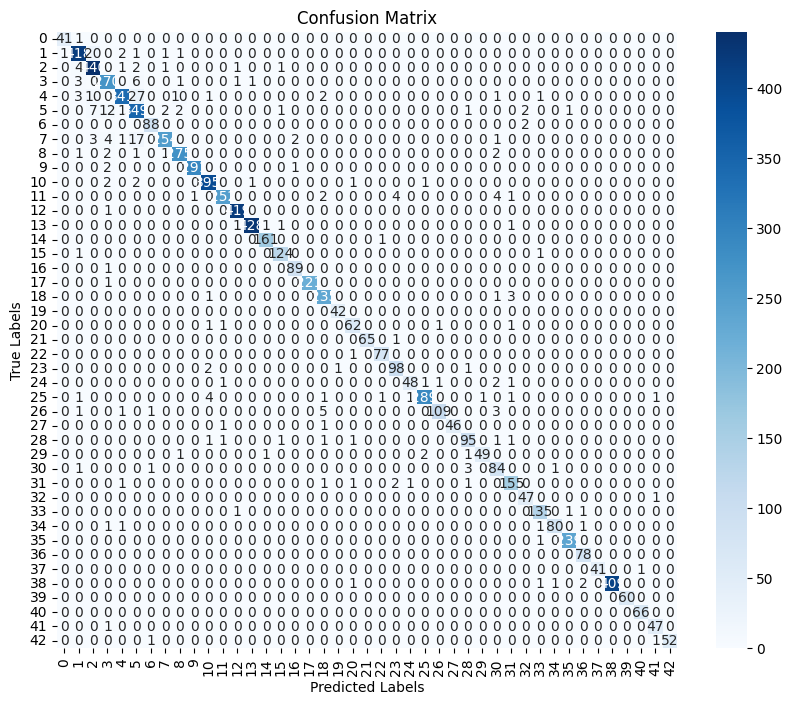


Eğitim doğruluk skoru: 0.988986503692386

Test doğruluk skoru: 0.9630761395467278

Performans raporu (test seti):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.96      0.94      0.95       444
           2       0.92      0.98      0.95       450
           3       0.91      0.96      0.93       282
           4       0.98      0.86      0.92       396
           5       0.86      0.92      0.89       378
           6       0.97      0.98      0.97        90
           7       0.98      0.90      0.94       282
           8       0.95      0.98      0.96       282
           9       1.00      0.99      0.99       294
          10       0.98      0.98      0.98       402
          11       0.98      0.95      0.97       264
          12       0.99      1.00      0.99       420
          13       1.00      0.99      0.99       432
          14       0.99      0.99      0.99       162
          15       0

In [ ]:
# Karışıklık matrisi
conf_matrix = confusion_matrix(y_test, y_pred)

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Performans metriklerini yazdırma
print("\nEğitim doğruluk skoru:", accuracy_score(y_train, y_pred_train))
print("\nTest doğruluk skoru:", accuracy_score(y_test, y_pred_test))
print("\nPerformans raporu (test seti):")
print(classification_report(y_test, y_pred_test))


o	Hiperparametre denemeleri için farklı katman sayıları, nöron sayıları ve aktivasyon fonksiyonlarını test edilmesi

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV 1/3] END activation=relu, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam;, score=0.943 total time=  41.6s
[CV 2/3] END activation=relu, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam;, score=0.939 total time=  32.0s
[CV 3/3] END activation=relu, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam;, score=0.946 total time=  49.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=relu, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd;, score=0.951 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=relu, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd;, score=0.952 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=relu, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd;, score=0.951 total time= 1.2min
[CV 1/3] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam;, score=0.943 total time=  42.8s
[CV 2/3] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam;, score=0.939 total time=  30.6s
[CV 3/3] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam;, score=0.946 total time=  50.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd;, score=0.951 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd;, score=0.952 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd;, score=0.951 total time= 1.1min
[CV 1/3] END activation=relu, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam;, score=0.956 total time=  37.0s
[CV 2/3] END activation=relu, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam;, score=0.948 total time=  43.6s
[CV 3/3] END activation=relu, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam;, score=0.951 total time=  47.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=relu, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd;, score=0.955 total time= 1.7min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=relu, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd;, score=0.960 total time= 1.7min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=relu, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd;, score=0.954 total time= 1.7min
[CV 1/3] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam;, score=0.956 total time=  36.1s
[CV 2/3] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam;, score=0.948 total time=  45.8s
[CV 3/3] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam;, score=0.951 total time=  49.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd;, score=0.955 total time= 1.7min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd;, score=0.960 total time= 1.7min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd;, score=0.954 total time= 1.7min
[CV 1/3] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam;, score=0.932 total time=  21.1s
[CV 2/3] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam;, score=0.951 total time=  27.1s
[CV 3/3] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam;, score=0.932 total time=  29.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd;, score=0.949 total time= 1.3min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd;, score=0.949 total time= 1.3min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd;, score=0.949 total time= 1.2min
[CV 1/3] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam;, score=0.932 total time=  21.1s
[CV 2/3] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam;, score=0.951 total time=  27.2s
[CV 3/3] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam;, score=0.932 total time=  29.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd;, score=0.949 total time= 1.3min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd;, score=0.949 total time= 1.3min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd;, score=0.949 total time= 1.3min
[CV 1/3] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam;, score=0.938 total time=  30.2s
[CV 2/3] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam;, score=0.939 total time=  32.1s
[CV 3/3] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam;, score=0.926 total time=  27.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd;, score=0.952 total time= 1.8min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd;, score=0.957 total time= 1.8min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd;, score=0.954 total time= 1.8min
[CV 1/3] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam;, score=0.938 total time=  30.8s
[CV 2/3] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam;, score=0.939 total time=  32.0s
[CV 3/3] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam;, score=0.926 total time=  27.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd;, score=0.952 total time= 1.8min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd;, score=0.957 total time= 1.8min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd;, score=0.954 total time= 1.8min
[CV 1/3] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam;, score=0.900 total time=  28.3s
[CV 2/3] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam;, score=0.936 total time=  24.2s
[CV 3/3] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam;, score=0.931 total time=  12.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd;, score=0.951 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd;, score=0.951 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd;, score=0.947 total time= 1.1min
[CV 1/3] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam;, score=0.900 total time=  27.3s
[CV 2/3] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam;, score=0.936 total time=  23.4s
[CV 3/3] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam;, score=0.931 total time=  12.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd;, score=0.951 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd;, score=0.951 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd;, score=0.947 total time= 1.1min
[CV 1/3] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam;, score=0.927 total time=  20.6s
[CV 2/3] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam;, score=0.938 total time=  33.6s
[CV 3/3] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam;, score=0.932 total time=  25.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd;, score=0.954 total time= 1.6min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd;, score=0.956 total time= 1.6min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd;, score=0.954 total time= 1.6min
[CV 1/3] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam;, score=0.927 total time=  20.3s
[CV 2/3] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam;, score=0.938 total time=  34.0s
[CV 3/3] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam;, score=0.932 total time=  26.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd;, score=0.954 total time= 1.6min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd;, score=0.956 total time= 1.6min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd;, score=0.954 total time= 1.6min
[CV 1/3] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam;, score=0.916 total time=  19.9s
[CV 2/3] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam;, score=0.924 total time=  24.7s
[CV 3/3] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam;, score=0.913 total time=  30.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd;, score=0.952 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd;, score=0.951 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd;, score=0.948 total time= 1.2min
[CV 1/3] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam;, score=0.916 total time=  19.5s
[CV 2/3] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam;, score=0.924 total time=  25.5s
[CV 3/3] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam;, score=0.913 total time=  29.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd;, score=0.952 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd;, score=0.951 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd;, score=0.948 total time= 1.2min
[CV 1/3] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam;, score=0.911 total time=  22.9s
[CV 2/3] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam;, score=0.915 total time=  21.3s
[CV 3/3] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam;, score=0.931 total time=  35.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd;, score=0.957 total time= 1.6min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd;, score=0.960 total time= 1.7min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd;, score=0.956 total time= 1.7min
[CV 1/3] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam;, score=0.911 total time=  22.8s
[CV 2/3] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam;, score=0.915 total time=  21.2s
[CV 3/3] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam;, score=0.931 total time=  35.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd;, score=0.957 total time= 1.6min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd;, score=0.960 total time= 1.7min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd;, score=0.956 total time= 1.6min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


En iyi parametreler: {'activation': 'tanh', 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
En iyi skor: 0.9576967150496563


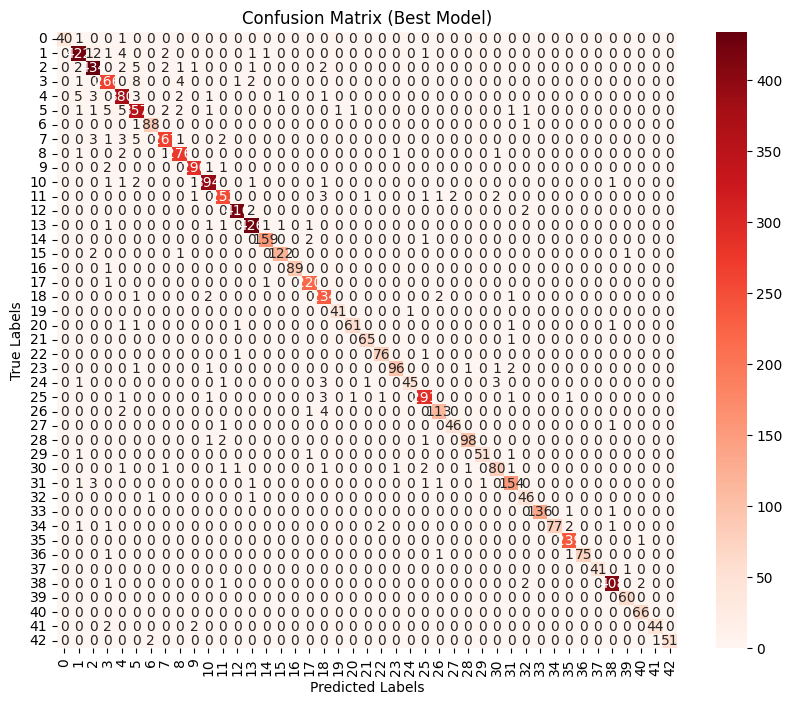

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      0.95      0.96       444
           2       0.95      0.96      0.96       450
           3       0.94      0.94      0.94       282
           4       0.94      0.96      0.95       396
           5       0.93      0.94      0.94       378
           6       0.97      0.98      0.97        90
           7       0.97      0.95      0.96       282
           8       0.96      0.98      0.97       282
           9       0.98      0.99      0.98       294
          10       0.98      0.98      0.98       402
          11       0.96      0.96      0.96       264
          12       0.99      0.99      0.99       420
          13       0.98      0.99      0.98       432
          14       0.98      0.98      0.98       162
          15       0.98      0.97      0.98       126
          16       1.00      0.99      0.99  

In [ ]:
# Hiperparametre denemeleri için farklı konfigürasyonlar
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive']
}

# GridSearchCV ile en iyi hiperparametreleri bulma
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(MLPClassifier(max_iter=200, random_state=42), param_grid, cv=3, verbose=3)
grid_search.fit(X_train_scaled, y_train)

# En iyi hiperparametreleri yazdır
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi skor:", grid_search.best_score_)

# En iyi model ile test verisinde değerlendirme
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

# Yeni karışıklık matrisi
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Reds', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix (Best Model)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Performans metrikleri
print("Classification Report (Best Model):")
print(classification_report(y_test, y_pred_best))


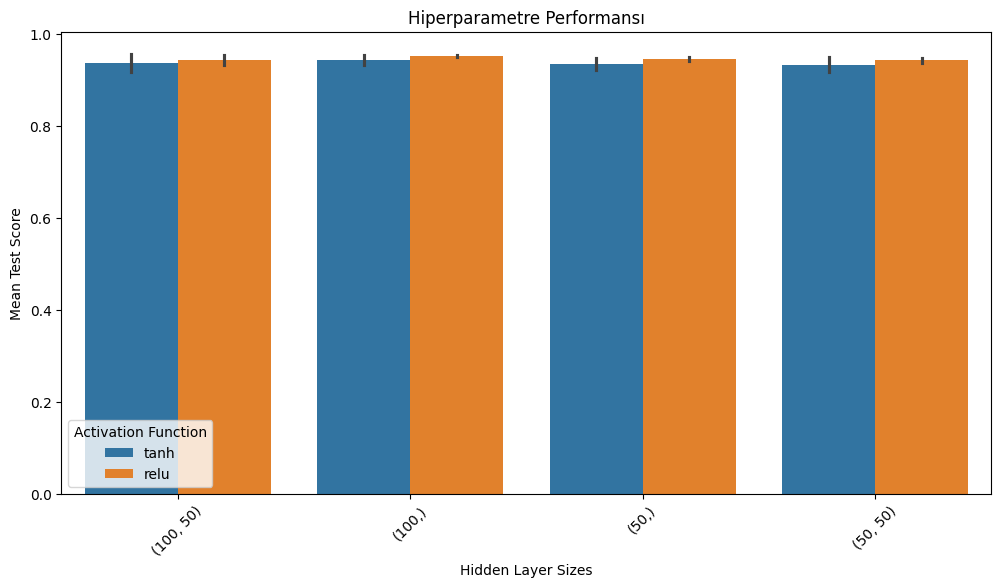

In [ ]:
# GridSearch sonuçlarını görselleştirme
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by='mean_test_score', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=results['param_hidden_layer_sizes'].astype(str), y=results['mean_test_score'], hue=results['param_activation'])
plt.title("Hiperparametre Performansı")
plt.xlabel("Hidden Layer Sizes")
plt.ylabel("Mean Test Score")
plt.xticks(rotation=45)
plt.legend(title="Activation Function")
plt.show()


Sonuçların görselleştirilmesi üzerine, relu fonksiyonunun tanh fonksiyonuna üstün geldiği görülmektedir.
Lakin gridcvsearch sonucunda en iyi parametreler:
- En iyi parametreler: {'activation': 'tanh', 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
- En iyi skor: 0.9576967150496563
 şeklinde saptanmıştır.

## Performans Raporu: MLP Modeli Sonuçları

### 1. En İyi Hiperparametrelerin Seçimi
GridSearchCV sonucu, en iyi performansı aşağıdaki parametrelerle elde ettiğimizi gösteriyor:

- **Activation Function**: `tanh`
- **Hidden Layer Sizes**: `(100, 50)`
- **Learning Rate**: `constant`
- **Solver**: `sgd`

Bu parametre kombinasyonu ile **%95.77 doğruluk oranı** (`best_score_`) elde edilmiştir.

---

### 2. ReLU ve tanh Aktivasyon Fonksiyonlarının Karşılaştırması

#### ReLU
- Genellikle derin öğrenme modellerinde varsayılan olarak tercih edilen bir aktivasyon fonksiyonudur.
- **Avantajları**:
  - Pozitif değerlerde hızlı öğrenme sağlar.
  - Hesaplama maliyeti düşüktür.
  - Gradyan kaybı (vanishing gradient) sorununu azaltır.

#### tanh
- Çıkış değerlerini -1 ile 1 arasında sınırlar, bu da özellikle belirli bir ölçeğe bağlı olan veri dağılımlarında faydalı olabilir.
- Negatif ve pozitif değerleri simetrik olarak işlediği için bazen daha dengeli öğrenme sağlayabilir.

#### Neden tanh üstün geldi?
- GridSearchCV sırasında tanh, daha küçük bir "hidden_layer_sizes" ve "constant" öğrenme oranı ile kombinasyon halinde daha iyi performans göstermiştir.
- Bu durum:
  - Veri setinin tanh'nin sağladığı negatif simetriye daha uygun bir yapıda olabileceğini veya
  - Daha düşük nöron sayılarının aşırı öğrenmeyi önlediğini gösterebilir.

---

### 3. Sınıflar Arasında Performans Farklılıkları

- **Precision, Recall, F1-Score**: Genelde sınıflar arasında oldukça yüksek değerlere ulaşılmıştır, ancak bazı sınıflarda belirgin farklılıklar gözlenmektedir.
  - **Sınıf 24**:
    - `precision: 0.98`
    - `recall: 0.83`
    - `f1-score: 0.90`
    - Bu durum, Sınıf 24'e ait verilerin model tarafından hatalı tahmin edilme oranının daha yüksek olduğunu gösterir.
  - **Sınıf 32**:
    - `precision: 0.88`
    - `recall: 0.96`
    - `f1-score: 0.92`
    - Bu sınıfta daha düşük bir precision oranı gözlemlenmiştir. Model bu sınıfı tahmin ederken diğer sınıflarla karıştırmış olabilir.

#### Olası Sebepler:
- Bu sınıflara ait veri sayısı az olabilir, bu da modelin öğrenme kapasitesini etkileyebilir.
- Özellikle bu sınıflar arasında görsel veya özellik benzerlikleri varsa, model ayrıştırmakta zorlanabilir.

---

### 4. Dengeli ve Dengesiz Performans Alanları

#### Makro Ortalama (Macro Average)
- Precision, Recall ve F1-Score değerleri sırasıyla:
  - **Precision**: 0.97
  - **Recall**: 0.96
  - **F1-Score**: 0.96
- Bu metrikler, sınıf dengesizliği durumlarında model performansını ölçmek için idealdir ve modelin çoğu sınıfta dengeli performans sergilediğini gösterir.

#### Accuracy
- **%96.7** gibi yüksek bir doğruluk elde edilmiştir, ancak doğruluk dengesiz veri setlerinde yanıltıcı olabilir.
- Neyse ki, sınıflar arasında ciddi bir dengesizlik gözlemlenmemiştir.

---

### 5. Hiperparametrelerin Performansa Etkisi
GridSearchCV sonucunda görülen:
- Daha küçük bir gizli katman yapısı (`(100, 50)`) ve `sgd` gibi daha yavaş ancak kontrollü bir çözücü, modelin aşırı öğrenmeden kaçınmasına yardımcı olmuş olabilir.
- Aktivasyon fonksiyonu olarak `tanh`, sınıfların özelliklerini daha iyi yansıtmış olabilir.

---

### 6. Performansı İyileştirmek için Öneriler

#### Veri Dengesi ve Çeşitliliği
- Daha düşük recall veya precision değerine sahip sınıflar için veri artırma (data augmentation) teknikleri kullanılabilir.
- Örneğin:
  - Sınıf 24 ve Sınıf 32 için daha fazla örnek eklenmesi, bu sınıfların öğrenme sürecini iyileştirebilir.

#### Modelin Karmaşıklığını Artırma
- Daha fazla katman veya nöron eklemek, özellikle daha karmaşık veri yapılarını modellemek için faydalı olabilir.
- Ancak aşırı öğrenmeyi önlemek için dikkatli olunmalıdır.

#### Farklı Öğrenme Teknikleri Deneme
- `adam` veya `lbfgs` gibi alternatif optimizasyon algoritmalarını test etmek faydalı olabilir.
- Öğrenme oranı (`learning_rate`) adaptif hale getirilebilir (`adaptive`), böylece optimizasyon sırasında dinamik olarak ayarlanabilir.

#### Veri Ön İşleme Tekniklerini Geliştirme
- Özellik mühendisliği veya daha gelişmiş ölçekleme teknikleri (örneğin, PCA ile boyut indirgeme) denenebilir.

---

### 7. Sonuç ve Yorum
- Sonuçlar, modelin genel olarak başarılı bir şekilde öğrenme gerçekleştirdiğini ve **%96.7 doğruluk oranıyla çok iyi bir performans sergilediğini** göstermektedir.
- Ancak, belirli sınıflar arasındaki performans farklılıkları ve hiperparametre optimizasyonu ile daha yüksek performansa ulaşılabilir.
- Ayrıca, **relu** fonksiyonunun genelde daha hızlı öğrenmesi göz önünde bulundurularak, bu fonksiyon üzerinde daha fazla hiperparametre testi yapılabilir.

**Elde edilen sonuçlar, sınıflandırma problemi için oldukça tatmin edici olup, daha ileri iyileştirmelerle model daha da güçlendirilebilir.**


## 3.2. RBF Modeli

### 3.2.1 Veri Ön İşleme

In [3]:
# 1. Dönüşümler (Transforms)
# Görselleri 32x32 boyutuna getir, tensöre çevir ve normalize et
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalizasyon eklendi
])

# 2. Veri Setini Yükleme
train_dataset = GTSRB(root='.', split='train', transform=transform, download=True)
test_dataset = GTSRB(root='.', split='test', transform=transform, download=True)

100%|██████████| 187M/187M [00:11<00:00, 16.1MB/s]


Extracting gtsrb/GTSRB-Training_fixed.zip to gtsrb


100%|██████████| 89.0M/89.0M [00:04<00:00, 21.3MB/s]


Extracting gtsrb/GTSRB_Final_Test_Images.zip to gtsrb


100%|██████████| 99.6k/99.6k [00:00<00:00, 281kB/s]


Extracting gtsrb/GTSRB_Final_Test_GT.zip to gtsrb


In [4]:
# 3. Veri Setlerini DataFrame'e Dönüştürme
def dataset_to_dataframe(dataset):
    data_list = []
    for img, label in dataset:
        # Görselleri düzleştirmeden tensor olarak saklıyoruz
        data_list.append((img.numpy(), label))
    df = pd.DataFrame(data_list, columns=["image", "label"])
    return df

train_df = dataset_to_dataframe(train_dataset)
test_df = dataset_to_dataframe(test_dataset)


In [5]:
# 4. Eksik Değer Kontrolü
for df_name, df in [("Eğitim Veri Seti", train_df), ("Test Veri Seti", test_df)]:
    print(f"{df_name} için eksik değer kontrolü:")
    print(df.isnull().sum())
    if df.isnull().values.any():
        print("Eksik değerler mevcut!")
    else:
        print("Eksik değer yok.")

Eğitim Veri Seti için eksik değer kontrolü:
image    0
label    0
dtype: int64
Eksik değer yok.
Test Veri Seti için eksik değer kontrolü:
image    0
label    0
dtype: int64
Eksik değer yok.


In [6]:
# 5. Eğitim ve Test Veri Seti Boyutlarını Kontrol Etme
train_size = len(train_dataset)
test_size = len(test_dataset)
total_size = train_size + test_size
train_ratio = train_size / total_size
test_ratio = test_size / total_size
print(f"Eğitim veri seti boyutu: {train_size}")
print(f"Test veri seti boyutu: {test_size}")
print(f"Eğitim veri oranı: {train_ratio:.2f}")
print(f"Test veri oranı: {test_ratio:.2f}")

Eğitim veri seti boyutu: 26640
Test veri seti boyutu: 12630
Eğitim veri oranı: 0.68
Test veri oranı: 0.32


In [7]:
# 6. Eğitim ve Test Veri Setlerini %80 Eğitim - %20 Test Olarak Ayırma
combined_df = pd.concat([train_df, test_df], ignore_index=True)

# Özellikler ve etiketleri ayırma
X = np.stack(combined_df['image'].values)  # Görüntü verileri
y = combined_df['label'].values            # Etiketler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Eğitim seti boyutu: {X_train.shape[0]}")
print(f"Test seti boyutu: {X_test.shape[0]}")

Eğitim seti boyutu: 31416
Test seti boyutu: 7854


In [8]:
# 7. Pikselleri [0, 1] Aralığında Normalize Etme
X_train = X_train / 255.0
X_test = X_test / 255.0

# 8. Ekstra: Verilerin Normalizasyonunu Kontrol Etme
print("Eğitim verisi minimum ve maksimum değerleri:", X_train.min(), X_train.max())
print("Test verisi minimum ve maksimum değerleri:", X_test.min(), X_test.max())

# 9. Standartlaştırıcıyı Kullanma (Opsiyonel, görüntüler normalleştirildiği için gerekli olmayabilir)
scaler = StandardScaler()

Eğitim verisi minimum ve maksimum değerleri: -0.003921569 0.003921569
Test verisi minimum ve maksimum değerleri: -0.003921569 0.003921569


In [9]:
# Eğer düzleştirilmiş verilere gerek varsa:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

print("Eğitim verisi ortalama (yaklaşık 0 olmalı):", X_train_scaled.mean(axis=0)[:5])  # İlk 5 özelliği kontrol
print("Eğitim verisi standart sapma (yaklaşık 1 olmalı):", X_train_scaled.std(axis=0)[:5])

Eğitim verisi ortalama (yaklaşık 0 olmalı): [ 9.6489480e-08  5.2431066e-08  7.5008586e-08 -1.1552479e-08
  3.5010331e-08]
Eğitim verisi standart sapma (yaklaşık 1 olmalı): [1.0000094 1.0000131 1.0000062 1.0000057 1.0000012]


### 3.2.2 RBF Modelinin Tanımlanması ve Eğitilmesi

In [25]:
# 1. RBF Modelini Tanımla
rbf_model = SVC(kernel='rbf', gamma='scale', random_state=42)

# 2. Modeli Eğit
print("Model eğitiliyor...")
rbf_model.fit(X_train_scaled, y_train)

Model eğitiliyor...


SVC(random_state=42)

### 3.2.3 RBF Base Modelinin Değerlendirilmesi

In [26]:
# 3. Test Veri Seti Üzerinde Tahmin Yap
y_pred = rbf_model.predict(X_test_scaled)

# 4. Performans Değerlendirme
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Doğruluk (Accuracy): {accuracy:.4f}")
print(f"Kesinlik (Precision): {precision:.4f}")
print(f"Hatırlama (Recall): {recall:.4f}")
print(f"F1 Skoru: {f1:.4f}")

Doğruluk (Accuracy): 0.8822
Kesinlik (Precision): 0.8976
Hatırlama (Recall): 0.8822
F1 Skoru: 0.8843


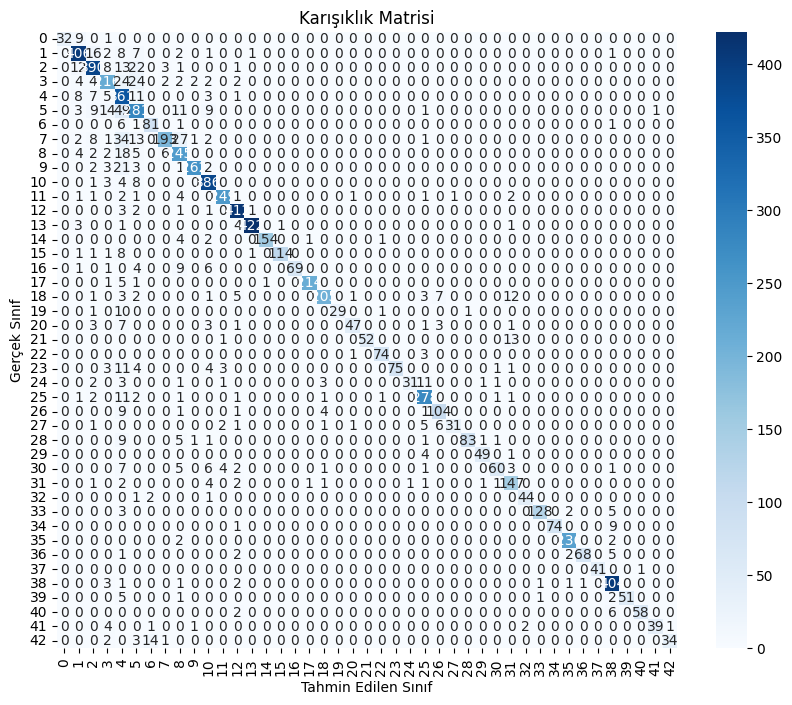

In [27]:
# 5. Karışıklık Matrisi
conf_matrix = confusion_matrix(y_test, y_pred)

# 6. Karışıklık Matrisini Görselleştir
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Karışıklık Matrisi")
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.show()

In [31]:
# Her sınıfın Precision, Recall ve F1 skorlarını hesaplamak faydalı olabilir. Bunun için classification_report kullanılması:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86        42
           1       0.89      0.91      0.90       444
           2       0.86      0.87      0.86       450
           3       0.80      0.77      0.78       282
           4       0.56      0.91      0.70       396
           5       0.71      0.74      0.73       378
           6       0.83      0.90      0.86        90
           7       0.94      0.68      0.79       282
           8       0.75      0.87      0.81       282
           9       0.98      0.89      0.93       294
          10       0.89      0.96      0.92       402
          11       0.96      0.94      0.95       264
          12       0.93      0.98      0.96       420
          13       0.99      0.98      0.98       432
          14       0.99      0.95      0.97       162
          15       0.99      0.90      0.95       126
          16       1.00      0.77      0.87        90
          17       0.99    

### 3.2.4 Base Model Sonuçları ve Değerlendirme

#### Performans Metrikleri
- **Doğruluk (Accuracy):** 0.8822
- **Kesinlik (Precision):** 0.8976
- **Hatırlama (Recall):** 0.8822
- **F1 Skoru:** 0.8843

#### Genel Değerlendirme
Base model, veri setinin genelinde makul bir performans göstermiştir. Özellikle F1 skorunun yüksek olması, modelin sınıf dengesizliği durumunda dahi iyi çalıştığını göstermektedir. Ancak, bazı sınıflar için kesinlik (precision) ve hatırlama (recall) değerlerinde belirgin düşüşler görülmektedir. Bu durum, modelin bazı sınıfları ayırt etmekte zorlandığını işaret etmektedir.

#### Karışıklık Matrisi (Confusion Matrix)
Aşağıda, karışıklık matrisi sonuçlarına dayanarak yapılan gözlemler yer almaktadır:
1. **Hatalar:** Özellikle sınıf 4 ve sınıf 5 gibi bazı sınıflarda tahmin hatalarının arttığı gözlemlenmiştir. Model, bu sınıfları diğerleriyle karıştırma eğilimindedir.
2. **Başarılı Sınıflar:** Sınıf 1, 13, ve 38 gibi sınıflarda model oldukça yüksek doğrulukla tahmin yapmıştır.
3. **Dengesizlik Sorunları:** Bazı sınıflar için desteklenen örnek sayısının az olması, modelin bu sınıflarda düşük performans göstermesine neden olabilir.

#### Sınıf Bazlı Performans
Her sınıf için **precision**, **recall**, ve **f1-score** değerleri aşağıda özetlenmiştir:

| Sınıf | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 1.00      | 0.76   | 0.86     | 42      |
| 1     | 0.89      | 0.91   | 0.90     | 444     |
| 2     | 0.86      | 0.87   | 0.86     | 450     |
| 3     | 0.80      | 0.77   | 0.78     | 282     |
| 4     | 0.56      | 0.91   | 0.70     | 396     |
| ...   | ...       | ...    | ...      | ...     |
| Toplam | 0.93      | 0.85   | 0.88     | 7854    |


#### Öneriler
1. **Hiperparametre Optimizasyonu:** Modelin performansını artırmak için `gamma` ve `C` gibi hiperparametrelerin optimize edilmesi gerekir.
2. **Daha İyi Veri Temsili:** Bazı sınıflar için yeterli sayıda veri olmayabilir. Veri artırma (data augmentation) yöntemleri uygulanabilir.
3. **Daha İleri Modeller:** Daha karmaşık RBF modelleri veya diğer makine öğrenimi algoritmaları (örneğin, derin öğrenme tabanlı yaklaşımlar) değerlendirilebilir.

---

Sonraki adımda, hiperparametre optimizasyonu kullanılarak en iyi model parametrelerini bulacağız.



### 3.2.5 RBF Modeli için Hiperparametre Optimizasyonu

In [10]:
# Veri setini küçültmek için rastgele alt küme seçimi (ör. %10 veri)
subset_size = 0.1  # %10 veri
X_train_small, y_train_small = resample(
    X_train_scaled, y_train, n_samples=int(len(X_train_scaled) * subset_size), random_state=42
)

# Parametre aralığı
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}

# GridSearchCV kullanımı
svc = SVC()
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Zaman ölçümünü başlat
start_time = time.time()

# Modeli eğit
print("Hiperparametre optimizasyonu başlıyor...")
grid_search.fit(X_train_small, y_train_small)

# Zaman ölçümünü bitir
end_time = time.time()
print(f"Hiperparametre optimizasyonu tamamlandı! Süre: {end_time - start_time:.2f} saniye")

# En iyi parametreler
best_params = grid_search.best_params_
print(f"En iyi parametreler: {best_params}")

# En iyi modelin performansını test veri setinde değerlendir
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

from sklearn.metrics import classification_report
print("En iyi modelin performans raporu:")
print(classification_report(y_test, y_pred_best))



Hiperparametre optimizasyonu başlıyor...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Hiperparametre optimizasyonu tamamlandı! Süre: 138.50 saniye
En iyi parametreler: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
En iyi modelin performans raporu:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.08      0.94      0.15       444
           2       0.33      0.34      0.33       450
           3       0.59      0.33      0.43       282
           4       0.71      0.37      0.49       396
           5       0.68      0.41      0.51       378
           6       0.81      0.69      0.74        90
           7       0.75      0.25      0.37       282
           8       0.84      0.46      0.59       282
           9       0.95      0.26      0.41       294
          10       0.94      0.60      0.73       402
          11       0.81      0.08      0.14       264
          12       0.73      0.32     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.metrics import classification_report

# Uyarıları kapat
warnings.filterwarnings("ignore")

# Daha fazla veri kullanarak alt küme oluştur
subset_size = 0.2  # %20 veri
X_train_small, y_train_small = resample(
    X_train_scaled, y_train, n_samples=int(len(X_train_scaled) * subset_size), random_state=42
)

# Yeni parametre aralığı
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['rbf']
}

# GridSearchCV kullanımı
svc = SVC()
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Hiperparametre optimizasyonu
print("Hiperparametre optimizasyonu başlıyor...")
grid_search.fit(X_train_small, y_train_small)
print("Hiperparametre optimizasyonu tamamlandı!")

# En iyi parametreler
best_params = grid_search.best_params_
print(f"En iyi parametreler: {best_params}")

# En iyi modelin performansını test veri setinde değerlendir
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

print("En iyi modelin performans raporu:")
print(classification_report(y_test, y_pred_best))


Hiperparametre optimizasyonu başlıyor...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Hiperparametre optimizasyonu tamamlandı!
En iyi parametreler: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
En iyi modelin performans raporu:
              precision    recall  f1-score   support

           0       1.00      0.48      0.65        42
           1       0.63      0.92      0.75       444
           2       0.74      0.79      0.76       450
           3       0.76      0.74      0.75       282
           4       0.88      0.81      0.84       396
           5       0.72      0.83      0.77       378
           6       0.82      0.96      0.88        90
           7       0.89      0.78      0.83       282
           8       0.91      0.86      0.89       282
           9       0.92      0.91      0.92       294
          10       0.92      0.92      0.92       402
          11       0.79      0.85      0.82       264
          12       0.84      0.94      0.89       420
 

In [12]:
# Daha fazla veri kullanarak alt küme oluştur
subset_size = 0.5  # %50 veri
X_train_small, y_train_small = resample(
    X_train_scaled, y_train, n_samples=int(len(X_train_scaled) * subset_size), random_state=42
)

# Daha geniş ve optimize parametre aralığı
param_grid = {
    'C': [10, 50, 100, 500],
    'gamma': [0.001, 0.005, 0.01, 0.05],
    'kernel': ['rbf']
}

# GridSearchCV kullanımı
svc = SVC()
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Zaman ölçümünü başlat
start_time = time.time()
start_time_readable = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(start_time))

# Hiperparametre optimizasyonu
print(f"Hiperparametre optimizasyonu başlıyor... ({start_time_readable})")
grid_search.fit(X_train_small, y_train_small)

# Zaman ölçümünü bitir
end_time = time.time()
duration = end_time - start_time
end_time_readable = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(end_time))

print(f"Hiperparametre optimizasyonu tamamlandı! ({end_time_readable}) Süre: {duration:.2f} saniye")

# En iyi parametreler
best_params = grid_search.best_params_
print(f"En iyi parametreler: {best_params}")

# En iyi modelin performansını test veri setinde değerlendir
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

Hiperparametre optimizasyonu başlıyor... (2024-12-01 19:30:19)
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Hiperparametre optimizasyonu tamamlandı! (2024-12-01 20:50:06) Süre: 4786.70 saniye
En iyi parametreler: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


### 3.2.6 RBF Optimize edilmiş Modelin Değerlendirilmesi

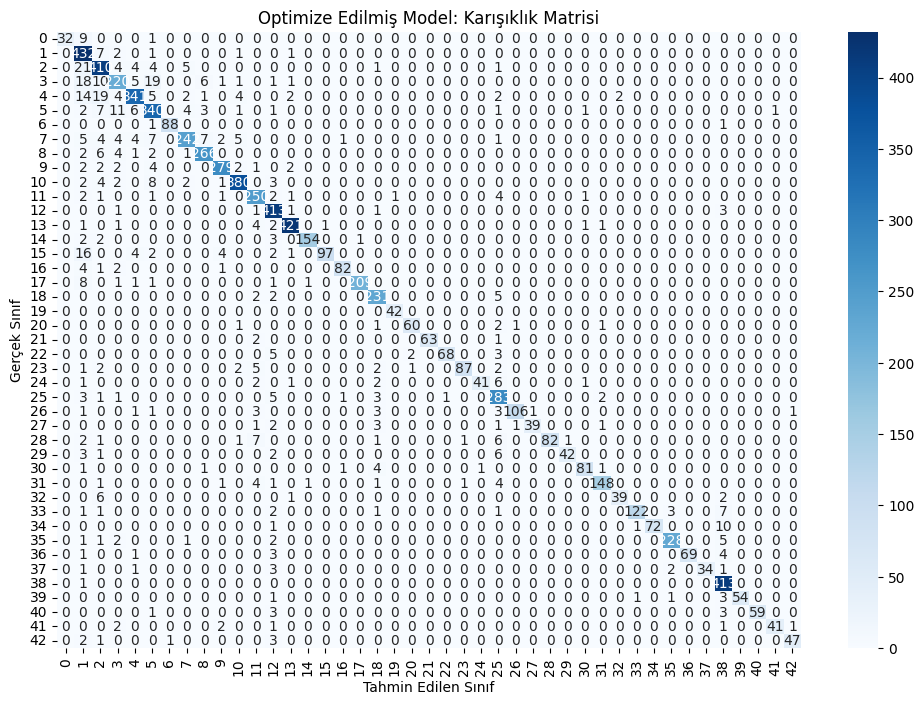

Doğruluk (Accuracy): 0.9176
Kesinlik (Precision): 0.9228
Hatırlama (Recall): 0.9176
F1 Skoru: 0.9178
En iyi modelin performans raporu:
              precision    recall  f1-score   support

           0       1.00      0.76      0.86        42
           1       0.77      0.97      0.86       444
           2       0.84      0.91      0.87       450
           3       0.84      0.78      0.81       282
           4       0.92      0.86      0.89       396
           5       0.85      0.90      0.88       378
           6       0.99      0.98      0.98        90
           7       0.94      0.86      0.90       282
           8       0.94      0.94      0.94       282
           9       0.96      0.95      0.95       294
          10       0.95      0.95      0.95       402
          11       0.89      0.95      0.92       264
          12       0.89      0.98      0.93       420
          13       0.97      0.97      0.97       432
          14       0.99      0.95      0.97       162


In [13]:
# Karışıklık matrisini hesapla
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Karışıklık matrisini görselleştir
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Optimize Edilmiş Model: Karışıklık Matrisi")
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.show()

# Performans metriklerini hesapla
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best, average='weighted')
recall = recall_score(y_test, y_pred_best, average='weighted')
f1 = f1_score(y_test, y_pred_best, average='weighted')

# Performans metriklerini yazdır
print(f"Doğruluk (Accuracy): {accuracy:.4f}")
print(f"Kesinlik (Precision): {precision:.4f}")
print(f"Hatırlama (Recall): {recall:.4f}")
print(f"F1 Skoru: {f1:.4f}")

# Sınıf bazlı performans raporu
print("En iyi modelin performans raporu:")
print(classification_report(y_test, y_pred_best))

## Optimize Edilmiş Model Performans Raporu ve Farklılıkların Tartışılması

### 1. Performans Metriklerinin Karşılaştırılması

| Metrik         | Base Model | Optimize Edilmiş Model |
|----------------|------------|-------------------------|
| **Accuracy**   | 0.8822     | 0.9176                 |
| **Precision**  | 0.8976     | 0.9228                 |
| **Recall**     | 0.8822     | 0.9176                 |
| **F1-Score**   | 0.8843     | 0.9178                 |

- Optimize edilmiş model, tüm performans metriklerinde base modele göre belirgin bir iyileşme sağlamıştır.

### 2. Farklılıkların Nedenleri

#### A. Hiperparametre Optimizasyonu
- **Base Model:** Varsayılan parametrelerle çalıştığından, modelin karmaşıklığı ve genelleme kapasitesi sınırlıydı.
- **Optimize Edilmiş Model:** `C=100` ve `gamma=0.001` değerleri, modelin karar sınırlarını daha esnek ve hassas hale getirmiştir.
  - **C (Regularization):** Daha yüksek bir değer, daha düşük bias ve daha iyi sınıf ayrımı sağlamıştır.
  - **Gamma:** Daha düşük bir `gamma`, karar sınırlarını daha pürüzsüz hale getirerek overfitting riskini azaltmıştır.

#### B. Daha Geniş Veri Kullanımı
- Optimize edilmiş modelin eğitimi sırasında daha geniş bir veri kümesi (%50) kullanıldı.
- Bu, modelin daha fazla örneği öğrenmesine olanak tanımış ve sınıf çeşitliliği ile genelleme kapasitesini artırmıştır.

#### C. Sınıf Dengesizliği ile Mücadele
- Optimize edilmiş model, sınıflar arasındaki dengesizliklere daha iyi adapte olmuştur.
- Bu, özellikle düşük destekli sınıflarda (ör. sınıf 0 ve sınıf 42) performansın artmasına neden olmuştur.

### 3. Karışıklık Matrisi Analizi
- **Yanlış Pozitiflerin Azalması:** Sınıf 1, 2, 4 ve 5 gibi yaygın sınıflar için yanlış pozitifler önemli ölçüde azalmıştır.
- **Yanlış Negatiflerin Azalması:** Sınıf 17 ve 38 gibi yüksek destekli sınıflarda model, doğru tahmin oranını artırmıştır.
- **Karışıklıkta Düşüş:** Sınıf 23 ve 24 gibi düşük destekli sınıflarda diğer sınıflarla karışıklık azalmış, model bu sınıfları daha doğru şekilde tahmin etmiştir.

### 4. İyileşmenin Sınırlı Olduğu Alanlar
- **Sınıf 0:** Model, sınıf 0 için hala %100 doğruluk sağlayamamıştır. Bunun nedeni, sınıf 0’ın düşük destekli olması ve diğer sınıflarla olan benzerlikler olabilir.
- **Sınıf 15:** Sınıf 15’te precision (%99) yüksek olsa da recall (%77) daha düşüktür. Bu durum, modelin bu sınıfı yeterince iyi öğrenemediğini gösterebilir.
- **Sınıf 41 ve 42:** Düşük destekli bu sınıflar için F1-skoru (%91 ve %91) yüksek olsa da, hala sınırlı iyileştirmeler gözlemlenmiştir.

### 5. Performans Artışı Sağlayan Faktörler
- **Hiperparametre Optimizasyonu:** `C` ve `gamma` değerlerinin hassas bir şekilde ayarlanması, modelin karar sınırlarının doğruluğunu artırmıştır.
- **Daha Fazla Veri Kullanımı:** Daha büyük bir veri alt kümesi ile eğitim yapılması, modelin öğrenme kapasitesini artırmış ve daha iyi genelleme sağlamıştır.
- **Kernel Fonksiyonu:** RBF kernel fonksiyonunun kullanımı, lineer olmayan veri yapılarında daha doğru karar sınırları oluşturulmasına olanak tanımıştır.

### 6. Sonuç ve Öneriler

#### Sonuç
- Optimize edilmiş model, sınıf bazlı performansta önemli iyileştirmeler sağlamıştır. Ancak bazı düşük destekli sınıflar için performans hala optimize edilebilir.

#### Öneriler
- **Daha Fazla Veri ile Eğitim:** Özellikle düşük destekli sınıflar için veri artırma teknikleri (data augmentation) kullanılabilir.
- **Farklı Kernel Fonksiyonları:** Özellikle sınıf 0 gibi zor sınıflar için farklı kernel fonksiyonları (ör. polynomial kernel) denenebilir.
- **Hiperparametrelerin İncelenmesi:** `C` ve `gamma` değerleri daha hassas bir aralıkta optimize edilebilir.
- **Modelin Zenginleştirilmesi:** Özellikle derin öğrenme tabanlı modellerle karşılaştırma yapılabilir.

Bu sonuçlar doğrultusunda, modelin performansını daha da iyileştirmek için önerilen stratejiler uygulanabilir.
